APPLE LEAF DISEASE DETECTION

CORELATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_excel("/content/dataset_apple.xlsx")
df.head()

,Unnamed: 0,area,perimeter,red_mean,green_mean,blue_mean,f1,f2,red_std,green_std,blue_std,f4,f5,f6,f7,f8,label
0,0,124.5,55.071068,112.886292,111.129883,105.791962,0.40,0.60,57.791859,48.914119,51.971887,2258.371633,66.743613,0.396585,0.051682,3.560280,0
1,1,35851.5,852.943212,115.087128,115.492050,105.732880,0.33,0.67,73.022480,62.556765,69.728627,2818.019351,70.842079,0.357964,0.044377,3.674359,0
2,2,36012.0,852.357425,115.097443,115.483444,105.823837,0.33,0.67,73.009350,62.564694,69.627734,2820.664360,70.898005,0.357484,0.044308,3.673801,0
3,3,36607.0,967.279219,123.863647,126.443405,134.987152,0.28,0.72,44.563725,40.467303,44.316694,2045.474207,56.127201,0.531323,0.057452,3.401497,0
4,4,37117.0,971.279219,123.863647,126.443405,134.987152,0.28,0.72,44.563725,40.467303,44.316694,2045.474207,56.127201,0.531323,0.057452,3.401497,0


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3153 entries, (6288, 40906.0, 1119.220343, 98.86141968, 103.6713867, 71.30171204, 0.0, 1.0) to (6287, 37194.0, 1008.877198, 99.24156189, 104.0711975, 71.67658997, 0.0, 1.0)
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   8            3152 non-null   float64
 1   14.86322314  3151 non-null   float64
 2   34.26588023  3151 non-null   float64
 3   254.9673751  3151 non-null   float64
 4   21.69193718  3151 non-null   float64
 5   0.835613301  3151 non-null   float64
 6   0.109163312  3151 non-null   float64
 7   3.658829007  3151 non-null   float64
 8   3            3151 non-null   float64
dtypes: float64(9)
memory usage: 799.3 KB


In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,8,14.86322314,34.26588023,254.9673751,21.69193718,0.835613301,0.109163312,3.658829007,3
count,3152.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,50.884824,46.274204,53.229255,2578.212656,51.480208,0.848106,0.274600,3.526879,2.555697
std,18.992509,19.807365,16.107903,3318.183320,31.034269,0.483641,0.399593,0.341016,0.496967
min,11.940648,11.923048,14.242118,140.106650,12.931087,0.139155,0.031045,1.793028,2.000000
10%,29.284019,26.167033,33.746251,319.703605,20.227937,0.269523,0.045549,3.042656,2.000000
25%,38.161598,34.325518,42.803231,496.845150,23.288623,0.439304,0.062447,3.284477,2.000000
50%,50.938017,42.952660,52.487551,1425.546503,40.556643,0.815766,0.099676,3.603111,3.000000
75%,58.039216,53.457623,60.853698,3325.886699,76.930213,1.090042,0.462159,3.835529,3.000000
90%,65.984928,62.642998,70.330068,5110.190627,94.510782,1.374728,0.514847,3.885517,3.000000
max,118.271961,120.862125,115.225120,21291.783530,154.561712,3.741429,3.656650,3.955185,3.000000


In [ ]:
df.columns

Index(['8', '14.86322314', '34.26588023', '254.9673751', '21.69193718',
       '0.835613301', '0.109163312', '3.658829007', '3'],
      dtype='object')

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,8,14.86322314,34.26588023,254.9673751,21.69193718,0.835613301,0.109163312,3.658829007,3
8,1.000000,0.941062,0.956070,0.852158,0.688397,0.340351,0.705875,-0.395206,-0.242691
14.86322314,0.941062,1.000000,0.875824,0.811988,0.538748,0.516836,0.783968,-0.235395,-0.017686
34.26588023,0.956070,0.875824,1.000000,0.811098,0.709717,0.258718,0.631082,-0.419026,-0.331641
254.9673751,0.852158,0.811988,0.811098,1.000000,0.818065,0.262479,0.627478,-0.673265,-0.194165
21.69193718,0.688397,0.538748,0.709717,0.818065,1.000000,-0.283034,0.220962,-0.874475,-0.668959
0.835613301,0.340351,0.516836,0.258718,0.262479,-0.283034,1.000000,0.822912,0.356089,0.678112
0.109163312,0.705875,0.783968,0.631082,0.627478,0.220962,0.822912,1.000000,-0.070729,0.270861
3.658829007,-0.395206,-0.235395,-0.419026,-0.673265,-0.874475,0.356089,-0.070729,1.000000,0.579365
3,-0.242691,-0.017686,-0.331641,-0.194165,-0.668959,0.678112,0.270861,0.579365,1.000000


<Axes: >

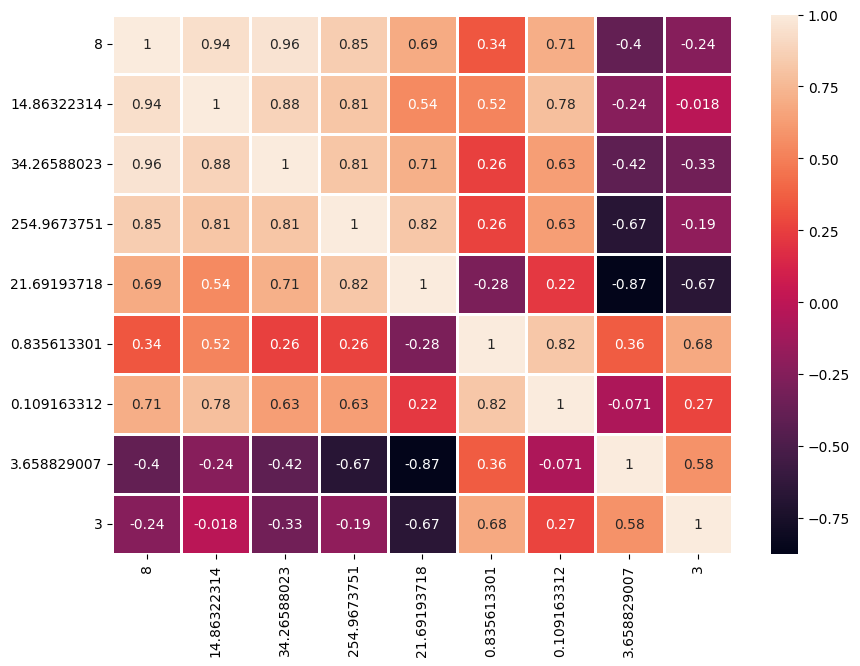

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,8,14.86322314,34.26588023,254.9673751,21.69193718,0.835613301,0.109163312,3.658829007,3
count,3152.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,50.884824,46.274204,53.229255,2578.212656,51.480208,0.848106,0.274600,3.526879,2.555697
std,18.992509,19.807365,16.107903,3318.183320,31.034269,0.483641,0.399593,0.341016,0.496967
min,11.940648,11.923048,14.242118,140.106650,12.931087,0.139155,0.031045,1.793028,2.000000
10%,29.284019,26.167033,33.746251,319.703605,20.227937,0.269523,0.045549,3.042656,2.000000
25%,38.161598,34.325518,42.803231,496.845150,23.288623,0.439304,0.062447,3.284477,2.000000
50%,50.938017,42.952660,52.487551,1425.546503,40.556643,0.815766,0.099676,3.603111,3.000000
75%,58.039216,53.457623,60.853698,3325.886699,76.930213,1.090042,0.462159,3.835529,3.000000
90%,65.984928,62.642998,70.330068,5110.190627,94.510782,1.374728,0.514847,3.885517,3.000000
max,118.271961,120.862125,115.225120,21291.783530,154.561712,3.741429,3.656650,3.955185,3.000000


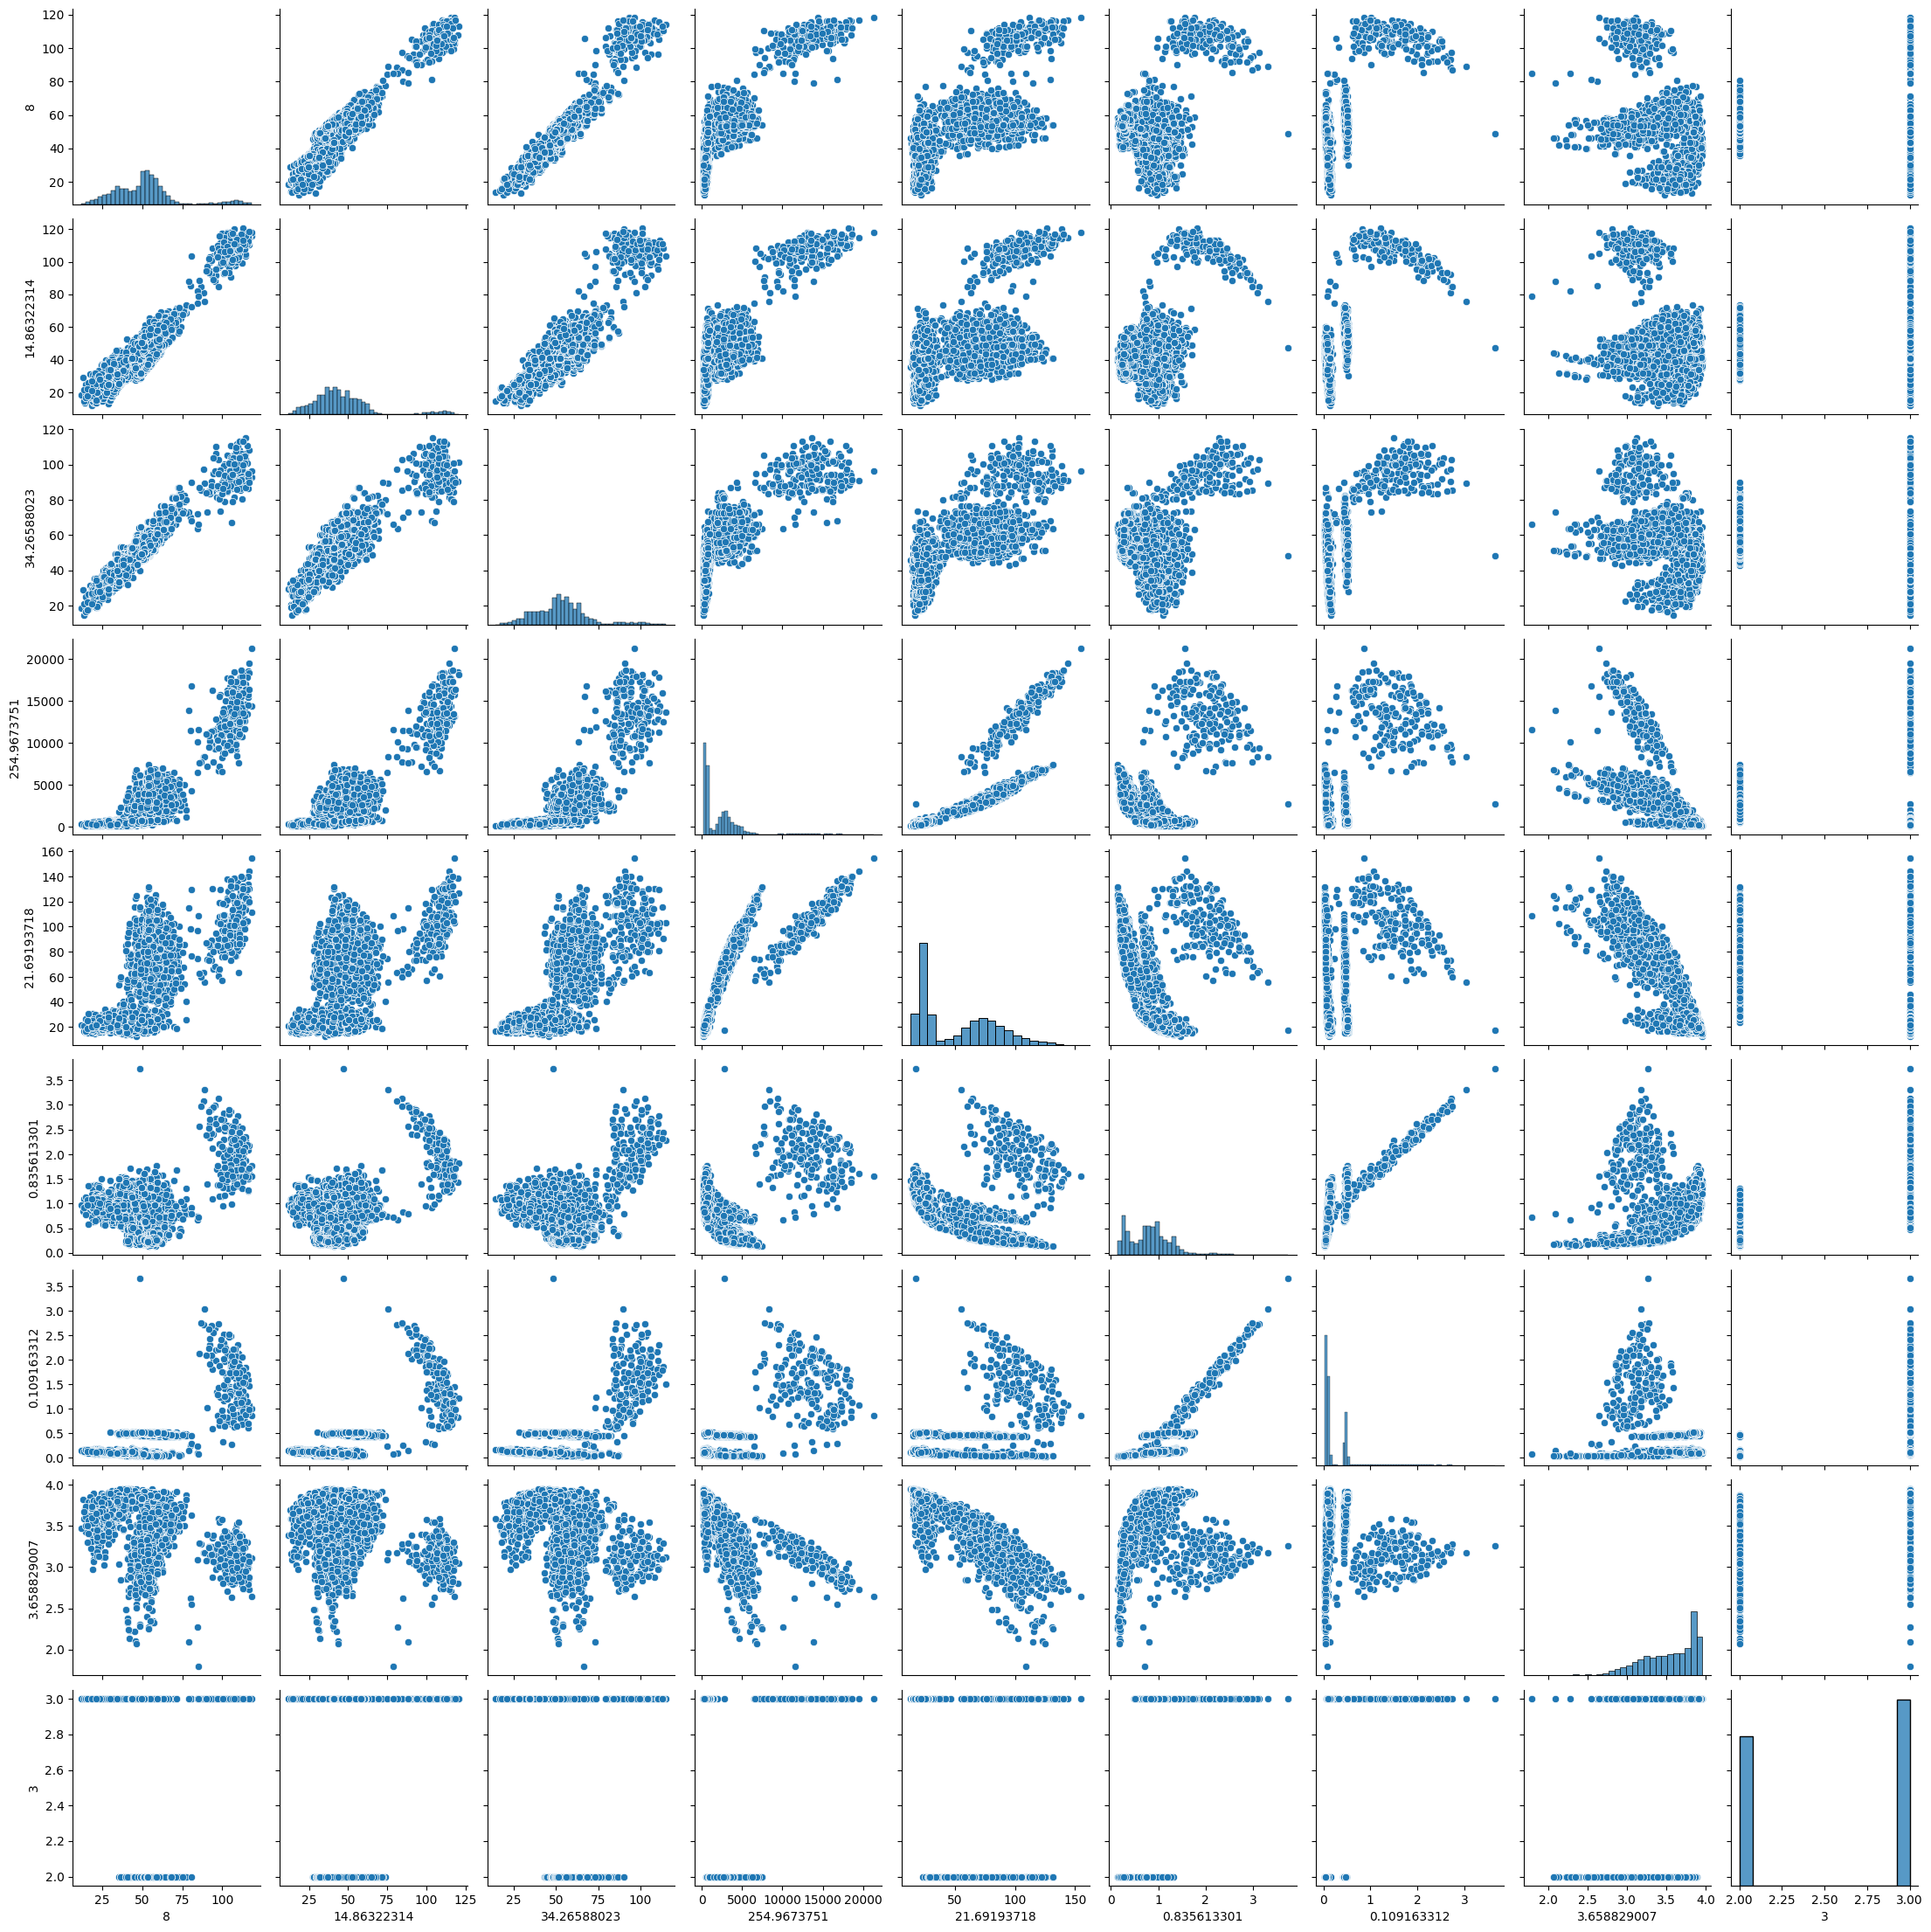

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

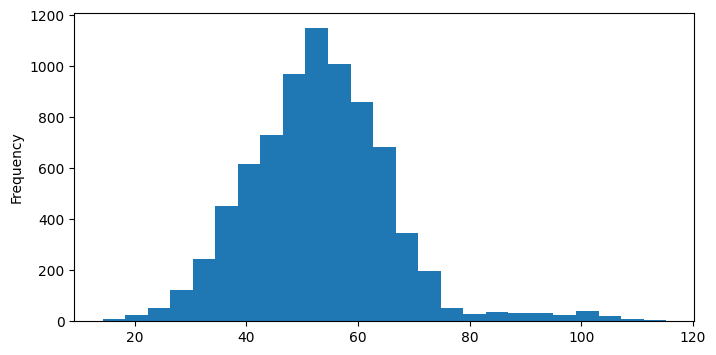

In [ ]:
df['blue_std'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

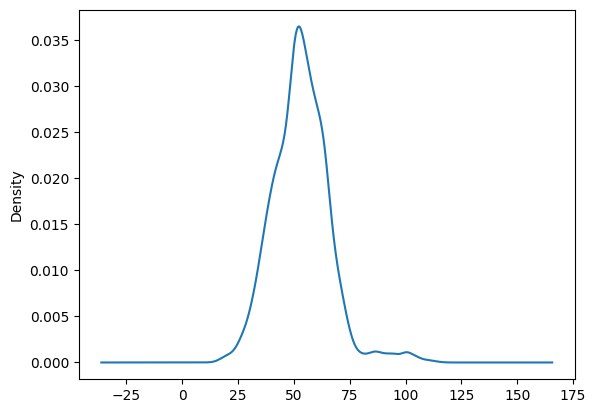

In [ ]:
df['blue_std'].plot.density()

<Axes: ylabel='Frequency'>

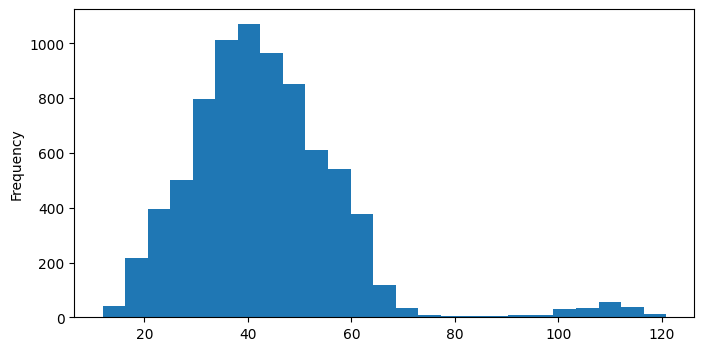

In [ ]:
df['green_std'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

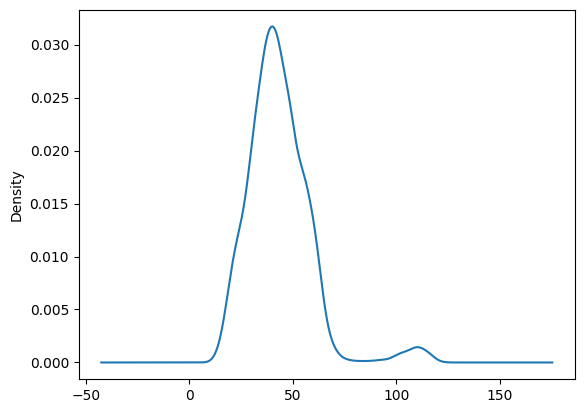

In [ ]:
df['green_std'].plot.density()

<Axes: ylabel='Frequency'>

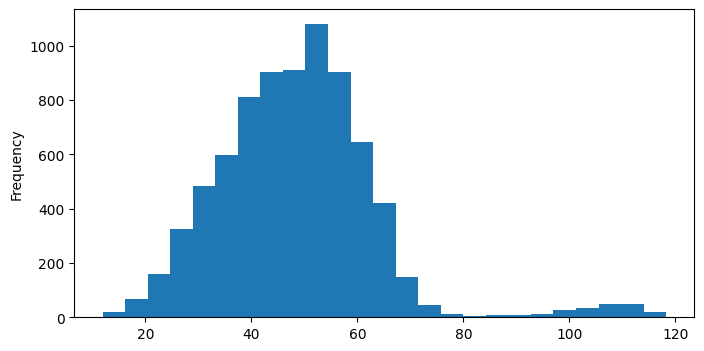

In [ ]:
df['red_std'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

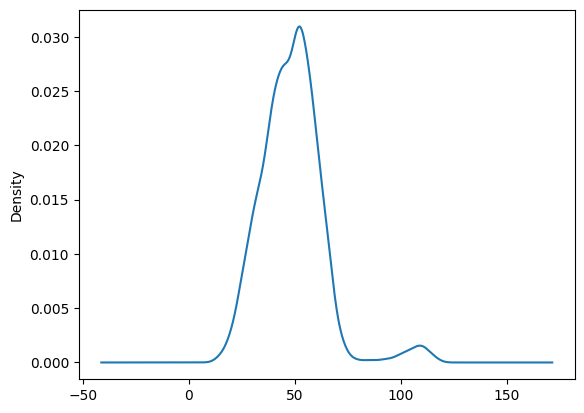

In [ ]:
df['red_std'].plot.density()

In [ ]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['8',
 '14.86322314',
 '34.26588023',
 '254.9673751',
 '21.69193718',
 '0.835613301',
 '0.109163312',
 '3.658829007',
 '3']

In [ ]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)
X.head()


Feature set size: (3153, 7)
Variable set size: (3153,)


,,,,,,,,8,14.86322314,34.26588023,254.9673751,21.69193718,0.835613301,0.109163312
6288,40906.0,1119.220343,98.861420,103.671387,71.301712,0.00,1.00,22.238508,16.197459,34.579490,391.526323,22.909918,0.850868,0.109748
6289,41654.0,1177.906635,98.733734,103.561264,71.139587,0.00,1.00,22.228893,16.244077,34.471678,394.892583,24.043706,0.784939,0.105087
6290,2411.5,249.296463,81.586914,87.353027,55.554672,0.00,1.00,39.485499,39.348228,38.390976,435.074872,21.027163,1.229949,0.515649
6291,35837.5,930.374671,103.903915,99.519699,99.677704,0.04,0.96,14.948484,21.575499,21.522931,267.099692,22.151191,0.826744,0.105648
6292,33089.0,929.788884,136.884888,145.771774,122.453171,0.03,0.97,105.849024,114.502896,86.580216,16632.626270,130.257383,1.235990,0.677950


In [ ]:
y.head()

6288  40906.0  1119.220343  98.861420   103.671387  71.301712   0.00  1.00    3.504956
6289  41654.0  1177.906635  98.733734   103.561264  71.139587   0.00  1.00    3.499096
6290  2411.5   249.296463   81.586914   87.353027   55.554672   0.00  1.00    3.838489
6291  35837.5  930.374671   103.903915  99.519699   99.677704   0.04  0.96    3.681023
6292  33089.0  929.788884   136.884888  145.771774  122.453171  0.03  0.97    2.851397
Name: 3.658829007, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=123)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)


Training feature set size: (2207, 7)
Test feature set size: (946, 7)
Training variable set size: (2207,)
Test variable set size: (946,)


lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Initialize SimpleImputer for X_train and y_train
imputer_X = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = imputer_X.fit_transform(X_train)

# Fit and transform y_train
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize Linear Regression model
lm = LinearRegression()

# Fit the model to the imputed data
lm.fit(X_train_imputed, y_train_imputed)

# After fitting, you can use the model for prediction, evaluation, etc.
# For example, you can predict on new data X_test:
# y_pred = lm.predict(X_test)


LinearRegression()

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: 3.5976845721919326


In [ ]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 1.02699431e-03  9.88192075e-03  3.59269893e-03 -3.80938273e-05
 -1.13765397e-02 -6.85417591e-02 -1.08852942e-01]


In [ ]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
8,0.001027
14.86322314,0.009882
34.26588023,0.003593
254.9673751,-0.000038
21.69193718,-0.011377
0.835613301,-0.068542
0.109163312,-0.108853


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize SimpleImputer for X_train
imputer_X = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = imputer_X.fit_transform(X_train)

# Compute n and k
n = X_train_imputed.shape[0]
k = X_train_imputed.shape[1]

# Compute degrees of freedom
dfN = n - k

# Make predictions on the imputed data
train_pred = lm.predict(X_train_imputed)

# Compute train error
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Compute standard errors
se = [0] * k
for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train_imputed[:, i] - np.mean(X_train_imputed[:, i])))
    se[i] = np.sqrt(r)

# Compute t-statistics
t_statistics = cdf['Coefficients'] / se

# Add standard errors and t-statistics to cdf DataFrame
cdf['Standard Error'] = se
cdf['t-statistic'] = t_statistics

# Display cdf DataFrame
cdf


,Coefficients,Standard Error,t-statistic
8,0.001027,1.193921e-04,8.601862
14.86322314,0.009882,1.148068e-04,86.074347
34.26588023,0.003593,1.402151e-04,25.622769
254.9673751,-0.000038,6.877756e-07,-55.387000
21.69193718,-0.011377,7.386528e-05,-154.017423
0.835613301,-0.068542,4.653234e-03,-14.729920
0.109163312,-0.108853,5.546385e-03,-19.625928


In [ ]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
14.86322314 > 
34.26588023 > 
8 > 
0.835613301 > 
0.109163312 > 
254.9673751 > 
21.69193718


In [ ]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

# Check if the index values in l are valid column names in df
valid_columns = [col for col in l if col in df.columns]

# Create a list of valid column names from the cdf index
valid_l = [col for col in l if col in valid_columns]

# Create subplots only for valid column names
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)

for i, col in enumerate(valid_l):
    ax = plt.subplot(gs[i])
    ax.scatter(df[col], df['blue_std'])
    ax.set_title(col + " vs. blue_std", fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

In [ ]:
from sklearn import metrics

# Combine y_train and train_pred into a DataFrame
results_df = pd.DataFrame({'y_train': y_train, 'train_pred': train_pred})

# Drop rows with NaN values
results_df_clean = results_df.dropna()

# Compute R-squared score
r_squared = metrics.r2_score(results_df_clean['y_train'], results_df_clean['train_pred'])
print("R-squared value of this fit:", round(r_squared, 3))


R-squared value of this fit: 0.9


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer for X_test
imputer_X_test = SimpleImputer(strategy='mean')

# Fit and transform X_test
X_test_imputed = imputer_X_test.fit_transform(X_test)

# Make predictions on the imputed data
predictions = lm.predict(X_test_imputed)

# Print the type and shape of the predictions
print("Type of the predicted object:", type(predictions))
print("Size of the predicted object:", predictions.shape)


Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (946,)


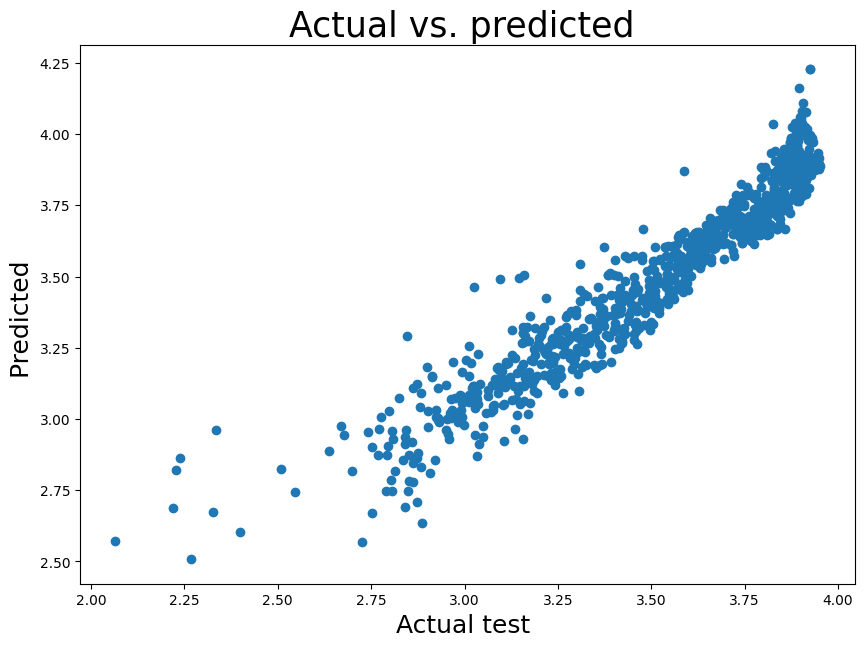

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted ",fontsize=25)
plt.xlabel("Actual test ",fontsize=18)
plt.ylabel("Predicted ", fontsize=18)
plt.scatter(x=y_test,y=predictions)

<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

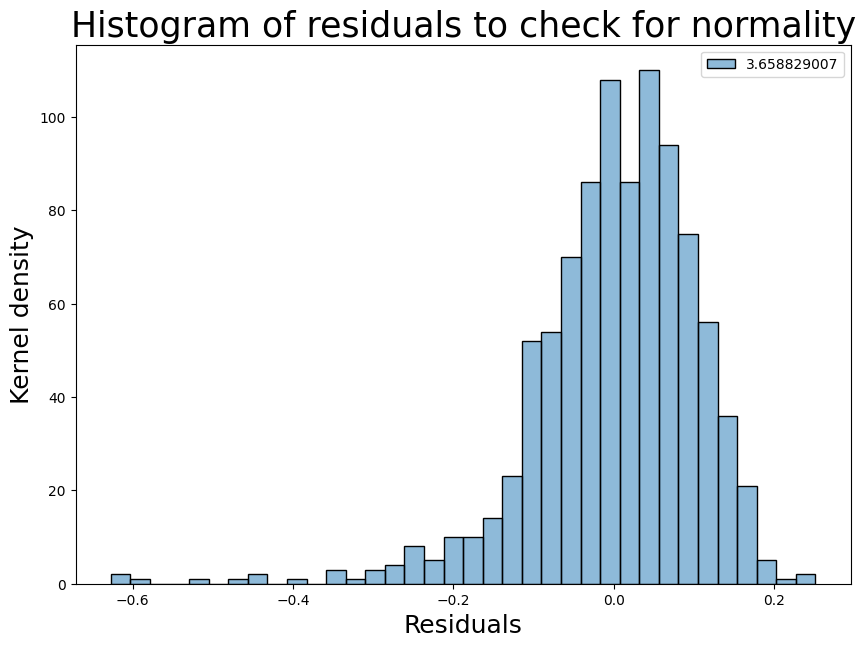

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])

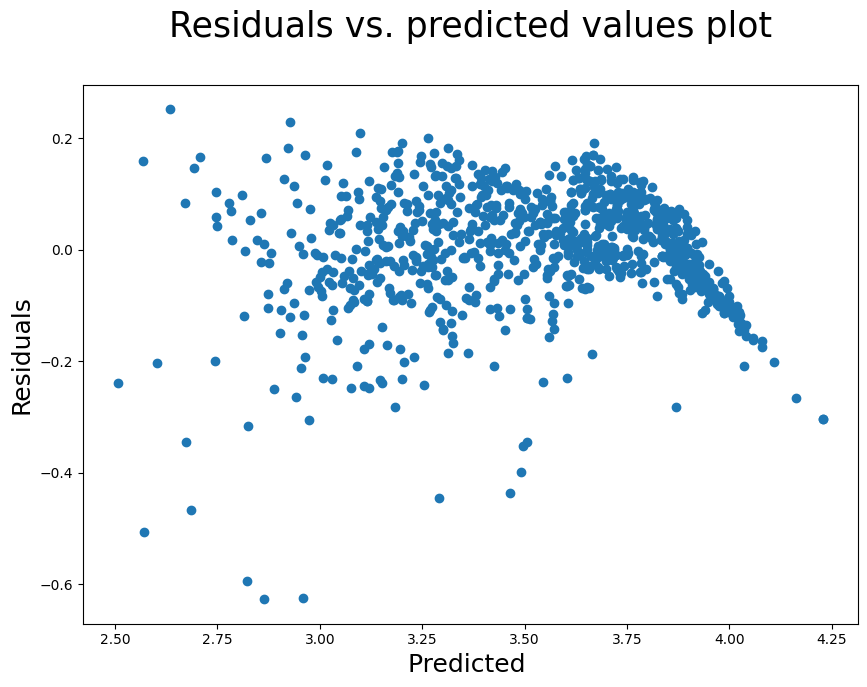

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot\n",fontsize=25)
plt.xlabel("Predicted ",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

MAE,MSE,RMSE

In [ ]:
import pandas as pd

# Combine y_test and predictions into a DataFrame
results_df = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

# Drop rows with NaN values
results_df_clean = results_df.dropna()

# Create a pandas Series for predictions with the index of y_test_clean
predictions_clean = results_df_clean['predictions']

# Compute evaluation metrics
mae = metrics.mean_absolute_error(results_df_clean['y_test'], predictions_clean)
mse = metrics.mean_squared_error(results_df_clean['y_test'], predictions_clean)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean absolute error (MAE):", mae)
print("Mean square error (MSE):", mse)
print("Root mean square error (RMSE):", rmse)


Mean absolute error (MAE): 0.0766246076521848
Mean square error (MSE): 0.010860744549890786
Root mean square error (RMSE): 0.1042148960076763


In [ ]:
import pandas as pd

# Combine y_test and predictions into a DataFrame
results_df = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

# Drop rows with NaN values
results_df_clean = results_df.dropna()

# Create a pandas Series for predictions with the index of y_test_clean
predictions_clean = results_df_clean['predictions']

# Compute evaluation metrics
mae = metrics.mean_absolute_error(results_df_clean['y_test'], predictions_clean)
mse = metrics.mean_squared_error(results_df_clean['y_test'], predictions_clean)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean absolute error (MAE):", mae)
print("Mean square error (MSE):", mse)
print("Root mean square error (RMSE):", rmse)


Mean absolute error (MAE): 0.0766246076521848
Mean square error (MSE): 0.010860744549890786
Root mean square error (RMSE): 0.1042148960076763


In [ ]:
#compute minmax value for observed price and expected price
import numpy as np
min=np.min(predictions/6000)
max=np.max(predictions/12000)
print(min, max)

0.0004179467801104737 0.0003522992906040687


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-1523281.6308567, -1523281.5308567, -1523281.4308567,
        -1523281.3308567, -1523281.2308567, -1523281.1308567,
        -1523281.0308567, -1523280.9308567, -1523280.8308567,
        -1523280.7308567, -1523280.6308567]),
 <BarContainer object of 10 artists>)

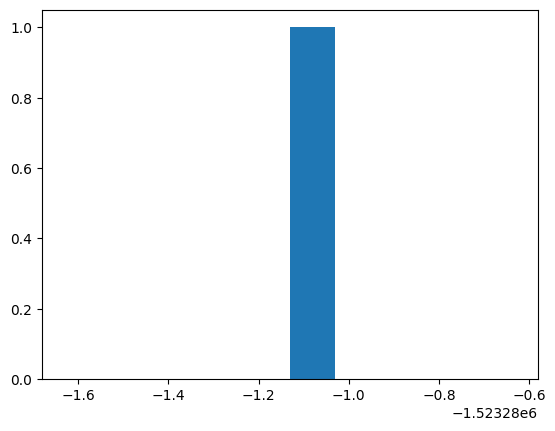

In [ ]:
#Compute MinMax value for Price=100
L = (100 - min)/(max - min)
L
plt.hist(L)

GRAPHS AND PLOTS

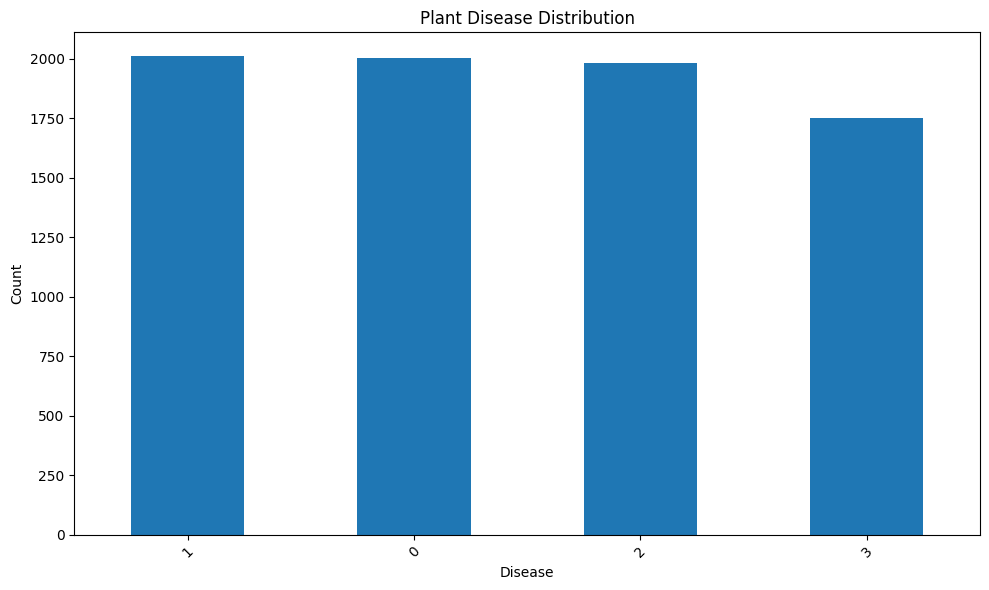

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = "apple.xlsx"
data = pd.read_excel('/content/dataset_apple.xlsx')

# Group by disease label and count the occurrences
disease_counts = data['label'].value_counts()

# Plotting
disease_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Plant Disease Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


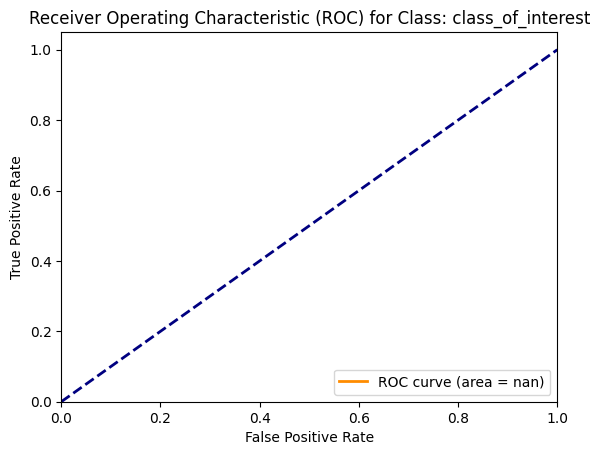

In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load data from Excel sheet
data = pd.read_excel('/content/dataset_apple.xlsx')

# Assuming your data has columns 'label' and one of the feature columns as predicted scores
true_labels = data['label']
predicted_scores = data['area']  # Assuming 'area' column as predicted scores, replace it with appropriate feature

# Convert labels to binary: 1 for a specific class and 0 for the rest
target_class = 'class_of_interest'  # Replace 'class_of_interest' with the class you want to analyze
binary_labels = (true_labels == target_class).astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(binary_labels, predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Class: {}'.format(target_class))
plt.legend(loc="lower right")
plt.show()


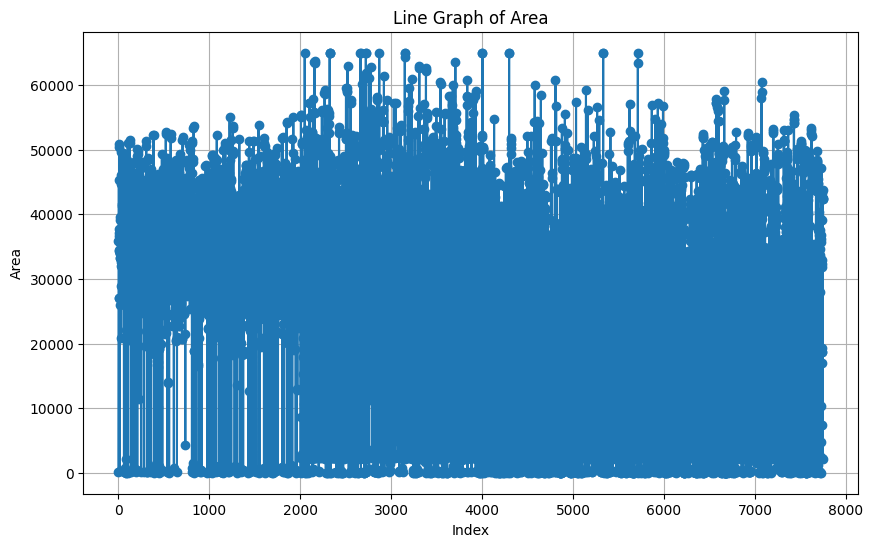

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('/content/dataset_apple.xlsx')
x_values = data.index
y_values = data['area']
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Line Graph of Area')
plt.xlabel('Index')
plt.ylabel('Area')
plt.grid(True)
plt.show()

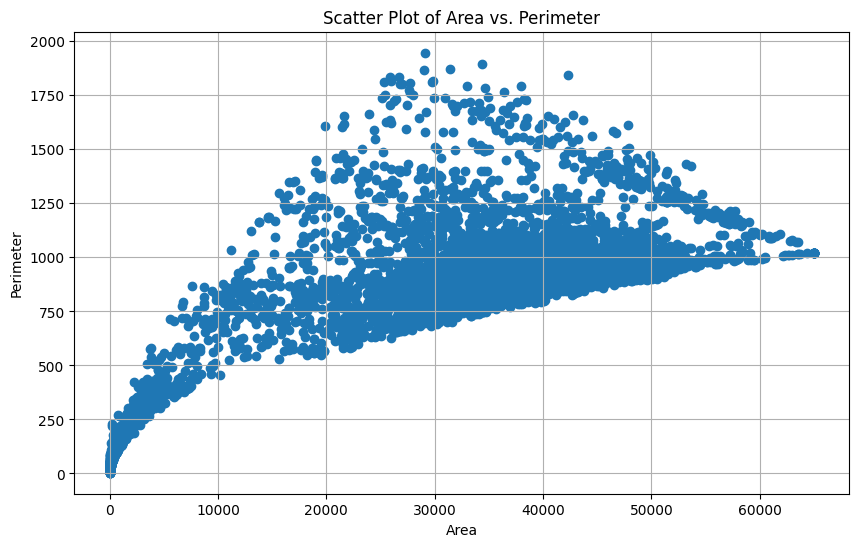

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('/content/dataset_apple.xlsx')
x_values = data['area']
y_values = data['perimeter']
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.title('Scatter Plot of Area vs. Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.grid(True)
plt.show()

F1 Score,Recall

In [5]:
import pandas as pd
from sklearn.metrics import f1_score
data = pd.read_excel('/content/dataset_apple.xlsx')
red_mean_values = data['area']
green_mean_values = data['perimeter']
threshold = 0.5
red_mean_pred = (red_mean_values > threshold).astype(int)
green_mean_pred = (green_mean_values > threshold).astype(int)
f1 = f1_score(red_mean_pred, green_mean_pred)
print("F1 Score between area and perimeter:", f1)

F1 Score between area and perimeter: 0.9998063891577927


In [6]:
import pandas as pd
from sklearn.metrics import recall_score
data = pd.read_excel('/content/dataset_apple.xlsx')
true_labels = data['area']
predicted_scores = data['perimeter']
threshold = 0.5
predicted_labels = (predicted_scores > threshold).astype(int)
true_labels_binary = (true_labels > threshold).astype(int)
recall = recall_score(true_labels_binary, predicted_labels)
print("Recall:", recall)

Recall: 1.0


ACCURACY

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
data = pd.read_excel('/content/dataset_apple.xlsx')
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
kmeans_train_labels = kmeans.labels_
kmeans_test_labels = kmeans.predict(X_test)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, kmeans_train_labels)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(kmeans_test_labels, xgb_predictions)
print("XGBoost Accuracy after KMeans:", xgb_accuracy)

Random Forest Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


XGBoost Accuracy after KMeans: 0.9974193548387097
